# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_4 import *


In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP4 and creating Train, Validation and Test DataLoaders

len train:  479
len val:  119
len test:  75


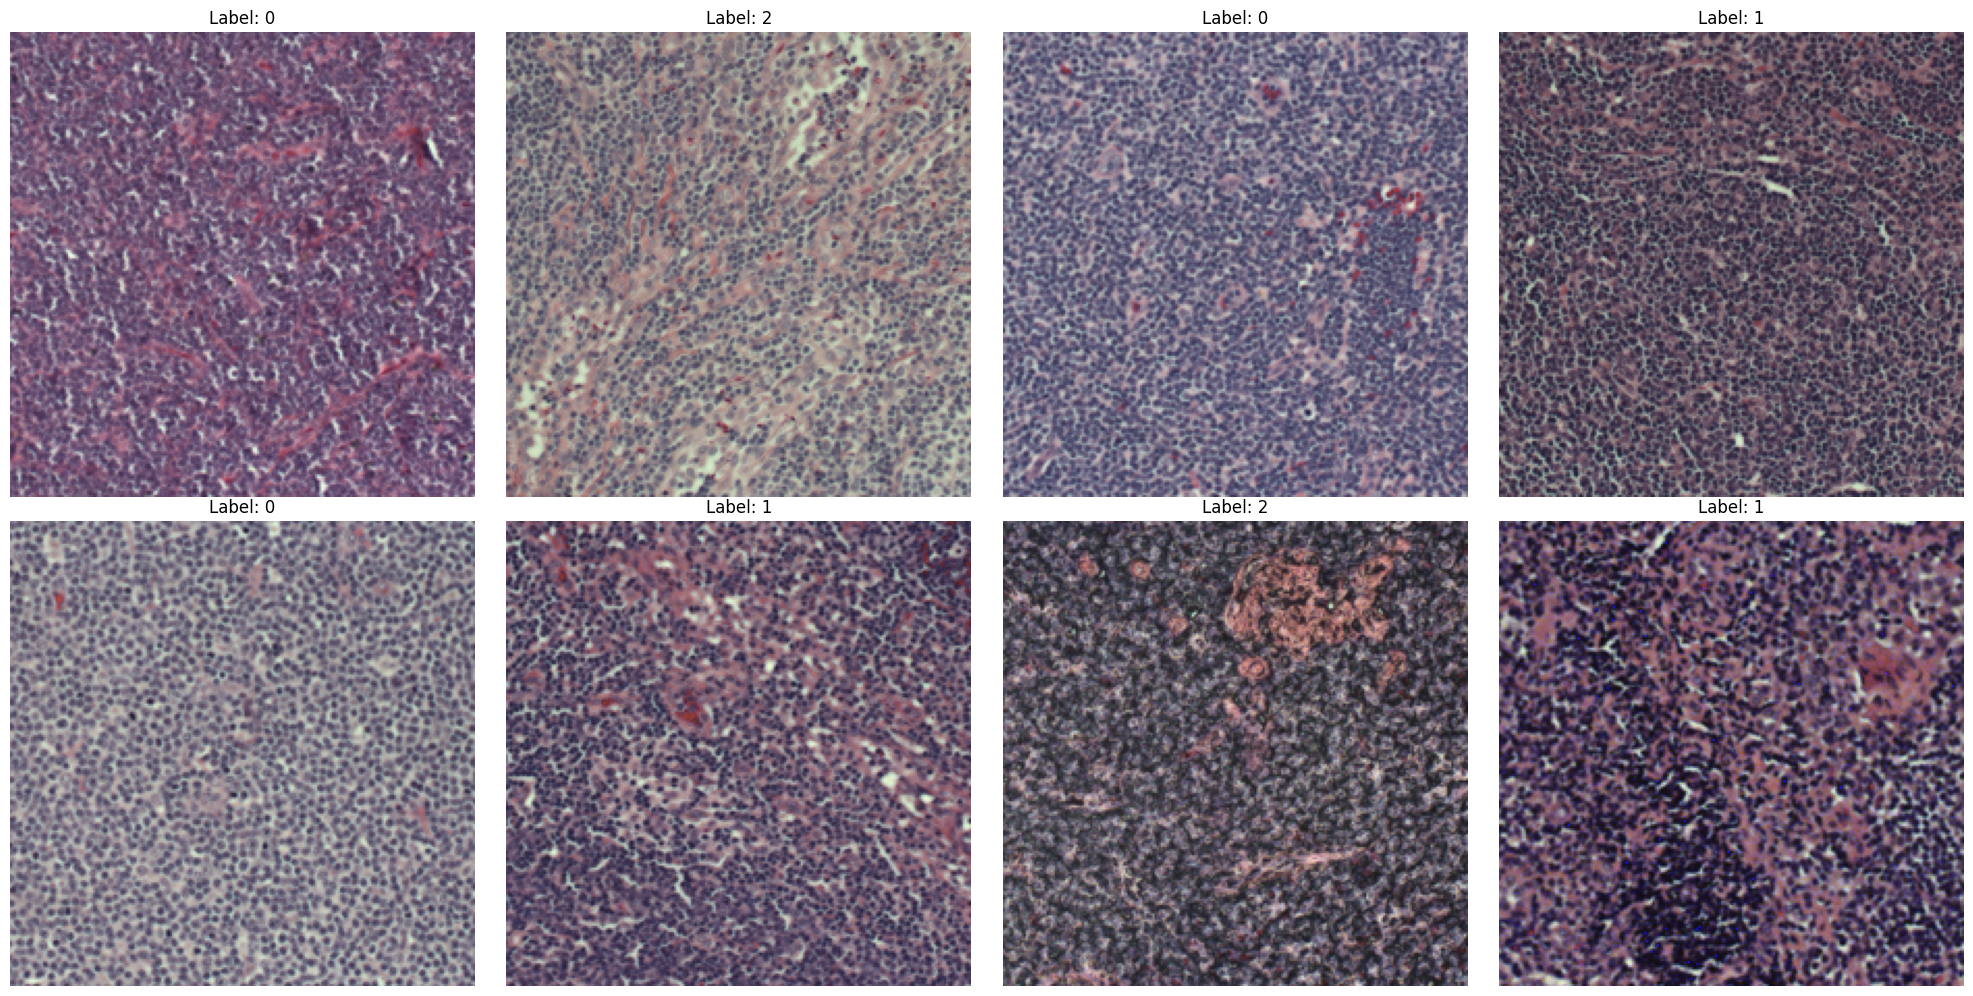

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP4.APP4, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 156MB/s]  


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app4.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.1460597990450132,--- Validation loss: 1.0406301322103548
Train Accuracy: 38.20%,--- Val Accuracy: 50.42%
--------------------------


Epoch [2/100] - Train loss: 0.9620696922184779,--- Validation loss: 0.834495833440989
Train Accuracy: 51.57%,--- Val Accuracy: 52.10%
--------------------------


Epoch [3/100] - Train loss: 0.8599059829383404,--- Validation loss: 0.792702544637087
Train Accuracy: 56.99%,--- Val Accuracy: 56.30%
--------------------------


Epoch [4/100] - Train loss: 0.7719311780123222,--- Validation loss: 0.8013002847423073
Train Accuracy: 62.63%,--- Val Accuracy: 61.34%
--------------------------


Epoch [5/100] - Train loss: 0.7319070029856019,--- Validation loss: 0.7068692375631893
Train Accuracy: 63.88%,--- Val Accuracy: 71.43%
--------------------------


Epoch [6/100] - Train loss: 0.6752320154723643,--- Validation loss: 0.677945653430554
Train Accuracy: 69.52%,--- Val Accuracy: 70.59%
--------------------------


Epoch [7/100] - Tra

# Plotting Result

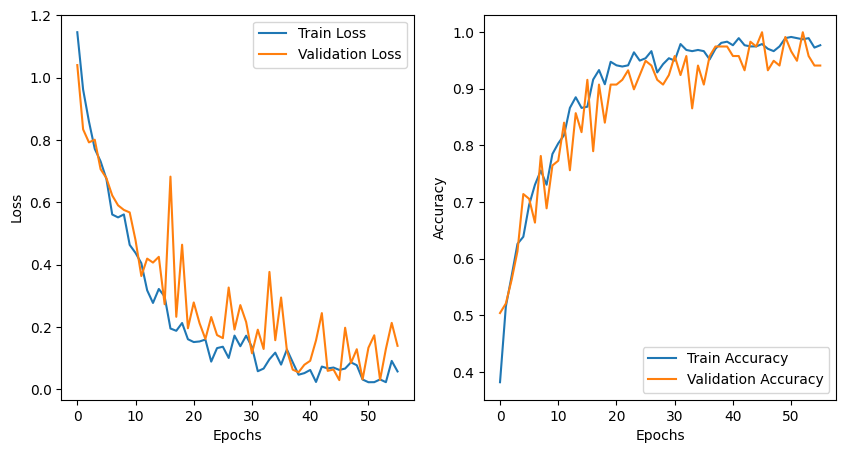

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        29
           1       0.90      0.96      0.93        27
           2       0.79      0.79      0.79        19

    accuracy                           0.89        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.90      0.89      0.89        75

Accuracy of the network on the test images: 89.33 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 160MB/s] 


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app4.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 1.003625872612995,--- Validation loss: 1.0901597507861482
Train Accuracy: 55.32%,--- Val Accuracy: 36.97%
--------------------------


Epoch [2/100] - Train loss: 0.7764444158321133,--- Validation loss: 1.0470036789148796
Train Accuracy: 71.40%,--- Val Accuracy: 44.54%
--------------------------


Epoch [3/100] - Train loss: 0.5616409027004042,--- Validation loss: 0.6092125878614538
Train Accuracy: 84.76%,--- Val Accuracy: 75.63%
--------------------------


Epoch [4/100] - Train loss: 0.3631166696921769,--- Validation loss: 0.33591359402953075
Train Accuracy: 90.19%,--- Val Accuracy: 86.55%
--------------------------


Epoch [5/100] - Train loss: 0.21647560201383084,--- Validation loss: 0.22174594494975916
Train Accuracy: 95.62%,--- Val Accuracy: 94.12%
--------------------------


Epoch [6/100] - Train loss: 0.13214503163335717,--- Validation loss: 0.1265969818943188
Train Accuracy: 96.87%,--- Val Accuracy: 95.80%
--------------------------


Epoch [7/100]

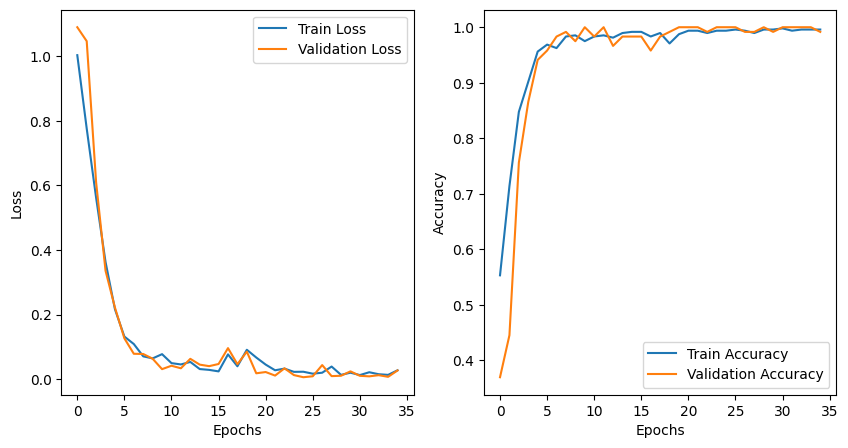

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      0.96      0.96        27
           2       0.95      0.95      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 93.9MB/s]


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app4.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.8391873088659474,--- Validation loss: 1.255039604772039
Train Accuracy: 62.00%,--- Val Accuracy: 38.66%
--------------------------


Epoch [2/100] - Train loss: 0.45758660955817315,--- Validation loss: 0.9897829965383065
Train Accuracy: 84.76%,--- Val Accuracy: 55.46%
--------------------------


Epoch [3/100] - Train loss: 0.2620052499288308,--- Validation loss: 0.3790069457863559
Train Accuracy: 92.90%,--- Val Accuracy: 83.19%
--------------------------


Epoch [4/100] - Train loss: 0.1916797106972816,--- Validation loss: 0.20093372814795551
Train Accuracy: 93.32%,--- Val Accuracy: 94.12%
--------------------------


Epoch [5/100] - Train loss: 0.12872900614721045,--- Validation loss: 0.16905211431889974
Train Accuracy: 96.24%,--- Val Accuracy: 92.44%
--------------------------


Epoch [6/100] - Train loss: 0.08653307118937217,--- Validation loss: 0.10772742550162707
Train Accuracy: 97.29%,--- Val Accuracy: 97.48%
--------------------------


Epoch [7/10

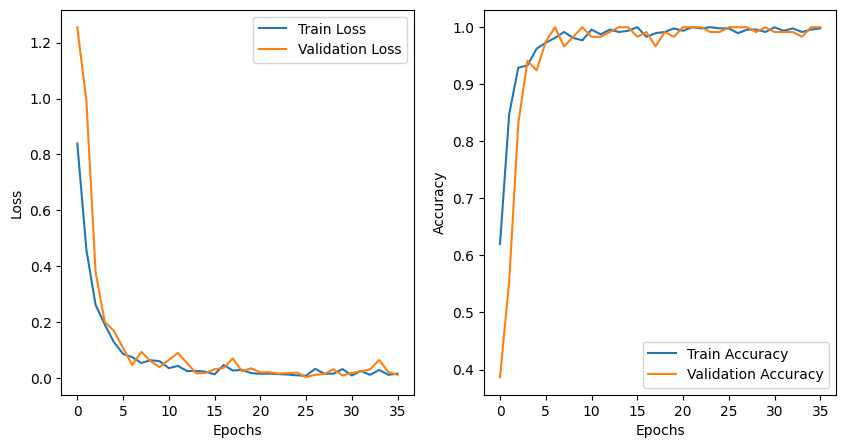

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      0.96      0.96        27
           2       0.95      0.95      0.95        19

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75

Accuracy of the network on the test images: 97.33 %
